In [22]:
import pandas as pd

df = pd.read_csv('dados/titanic.csv')

In [23]:
df

,identificacao,classe_da_passagem,nome,sexo,idade,irmaos_a_bordo,pais_ou_filhos_a_bordo,bilhete,valor_bilhete,cabine,porto_de_embarque,sobreviveu
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [24]:
df.isnull().sum()

identificacao               0
classe_da_passagem          0
nome                        0
sexo                        0
idade                     177
irmaos_a_bordo              0
pais_ou_filhos_a_bordo      0
bilhete                     0
valor_bilhete               0
cabine                    687
porto_de_embarque           2
sobreviveu                  0
dtype: int64

In [25]:
df.describe(include='O').T

,count,unique,top,freq
nome,891,891,"Braund, Mr. Owen Harris",1
sexo,891,2,male,577
bilhete,891,681,347082,7
cabine,204,147,B96 B98,4
porto_de_embarque,889,3,S,644


In [26]:
round(df.isnull().sum() / len(df) * 100, 2)

identificacao              0.00
classe_da_passagem         0.00
nome                       0.00
sexo                       0.00
idade                     19.87
irmaos_a_bordo             0.00
pais_ou_filhos_a_bordo     0.00
bilhete                    0.00
valor_bilhete              0.00
cabine                    77.10
porto_de_embarque          0.22
sobreviveu                 0.00
dtype: float64

In [27]:
df = df.drop('cabine', axis=1)

In [28]:
df.loc[df['idade'].isnull(), 'idade'] = df['idade'].mean()
df.loc[df['porto_de_embarque'].isnull(), 'porto_de_embarque'] = df['porto_de_embarque'].mode()[0]

In [29]:
df.isnull().sum()

identificacao             0
classe_da_passagem        0
nome                      0
sexo                      0
idade                     0
irmaos_a_bordo            0
pais_ou_filhos_a_bordo    0
bilhete                   0
valor_bilhete             0
porto_de_embarque         0
sobreviveu                0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   identificacao           891 non-null    int64  
 1   classe_da_passagem      891 non-null    int64  
 2   nome                    891 non-null    object 
 3   sexo                    891 non-null    object 
 4   idade                   891 non-null    float64
 5   irmaos_a_bordo          891 non-null    int64  
 6   pais_ou_filhos_a_bordo  891 non-null    int64  
 7   bilhete                 891 non-null    object 
 8   valor_bilhete           891 non-null    float64
 9   porto_de_embarque       891 non-null    object 
 10  sobreviveu              891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
df.sexo.unique()

array(['male', 'female'], dtype=object)

In [32]:
df.loc[df['sexo'] == 'male', 'sexo'] = 0
df.loc[df['sexo'] == 'female', 'sexo'] = 1

df['sexo'] = pd.to_numeric(df['sexo'])

In [33]:
df.porto_de_embarque.unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
df.loc[df['porto_de_embarque'] == 'S', 'porto_de_embarque'] = 0
df.loc[df['porto_de_embarque'] == 'C', 'porto_de_embarque'] = 1
df.loc[df['porto_de_embarque'] == 'Q', 'porto_de_embarque'] = 2

df['porto_de_embarque'] = pd.to_numeric(df['porto_de_embarque'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   identificacao           891 non-null    int64  
 1   classe_da_passagem      891 non-null    int64  
 2   nome                    891 non-null    object 
 3   sexo                    891 non-null    int64  
 4   idade                   891 non-null    float64
 5   irmaos_a_bordo          891 non-null    int64  
 6   pais_ou_filhos_a_bordo  891 non-null    int64  
 7   bilhete                 891 non-null    object 
 8   valor_bilhete           891 non-null    float64
 9   porto_de_embarque       891 non-null    int64  
 10  sobreviveu              891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [36]:
df = df.drop(['nome', 'bilhete'], axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   identificacao           891 non-null    int64  
 1   classe_da_passagem      891 non-null    int64  
 2   sexo                    891 non-null    int64  
 3   idade                   891 non-null    float64
 4   irmaos_a_bordo          891 non-null    int64  
 5   pais_ou_filhos_a_bordo  891 non-null    int64  
 6   valor_bilhete           891 non-null    float64
 7   porto_de_embarque       891 non-null    int64  
 8   sobreviveu              891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [41]:
X = df.drop('sobreviveu', axis=1)
y = df[['sobreviveu']]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()

X_train = normalizador.fit_transform(X_train)

X_test = normalizador.transform(X_test)

In [44]:
# Biblioteca de algoritmo de machine Learning Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Bibliotecas apara avaliar desempenho de modelos de machine learning de classificação
from sklearn.metrics import classification_report, confusion_matrix

# Bibliotecas de Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

def avaliar_model(y_test, y_pred):
    # Criando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotando a matriz de confusão com um heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Exibindo o classification report
    print(classification_report(y_test, y_pred))

C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


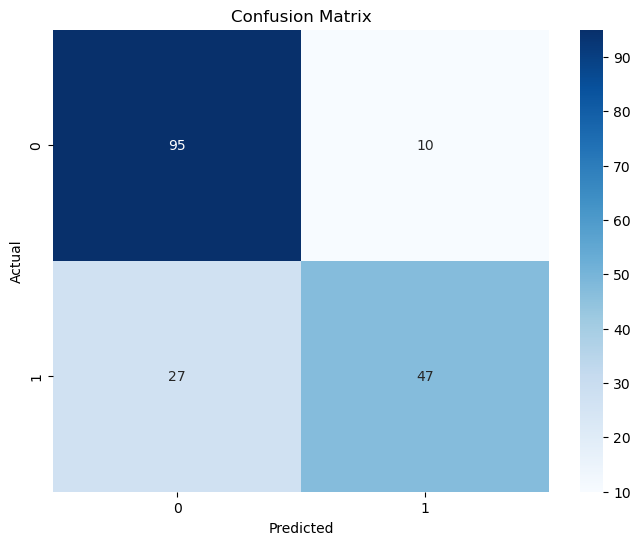

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



In [45]:
from sklearn import svm

# Cria uma instância do modelo
svmc = svm.SVC()
# Treina o modelo com a base de treinamento
svmc.fit(X_train, y_train)

# Realiza a predição dos valores de teste
y_predict = svmc.predict(X_test)

avaliar_model(y_test, y_predict)

C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


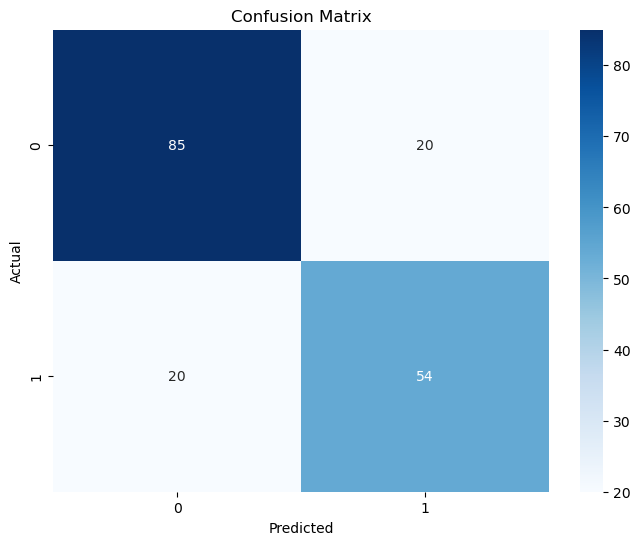

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [47]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model_treinado = nb_model.fit(X_train, y_train)

y_predict = nb_model_treinado.predict(X_test)

avaliar_model(y_test, y_predict)